In [93]:
from qiskit import *
from qiskit.visualization import *
from numpy import zeros, ones
from math import *
from numpy import outer
from qiskit.quantum_info import DensityMatrix
from qiskit.extensions import UnitaryGate
import numpy as np

In [2]:
#initialize dimension vectors
n = 8
a = 1/sqrt(n) * (ones([n]))
print(a)

[0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.35355339
 0.35355339 0.35355339]


In [3]:
qc = QuantumCircuit(3)
qc.initialize(a, [0, 1, 2])

qc.measure_all()
qc.draw()

»
   q_0: »
        »
   q_1: »
        »
   q_2: »
        »
meas_0: »
        »
meas_1: »
        »
meas_2: »
        »
«        ┌──────────────────────────────────────────────────────────────────────────────┐»
«   q_0: ┤0                                                                             ├»
«        │                                                                              │»
«   q_1: ┤1 initialize(0.35355,0.35355,0.35355,0.35355,0.35355,0.35355,0.35355,0.35355) ├»
«        │                                                                              │»
«   q_2: ┤2                                                                             ├»
«        └──────────────────────────────────────────────────────────────────────────────┘»
«meas_0: ════════════════════════════════════════════════════════════════════════════════»
«                                                                                        »
«meas_1: ════════════════════════════════════════════════════════════════════════════════»
«                                                                                        »
«meas_2: ════════════════════════════════════════════════════════════════════════════════»
«                                                                                        »
«         ░ ┌─┐      
«   q_0: ─░─┤M├──────
«         ░ └╥┘┌─┐   
«   q_1: ─░──╫─┤M├───
«         ░  ║ └╥┘┌─┐
«   q_2: ─░──╫──╫─┤M├
«         ░  ║  ║ └╥┘
«meas_0: ════╩══╬══╬═
«               ║  ║ 
«meas_1: ═══════╩══╬═
«                  ║ 
«meas_2: ══════════╩═
«

In [4]:
#collapses in any one state on measurement
result = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
print(result)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]


{'000': 129, '011': 120, '010': 134, '111': 123, '101': 118, '110': 126, '001': 138, '100': 136}


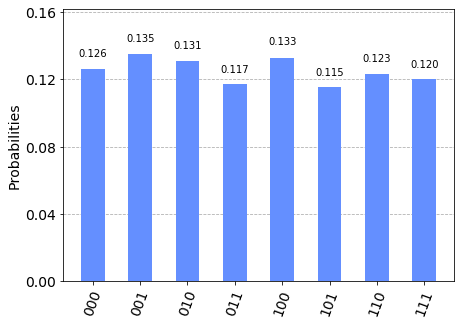

In [5]:
#all states almost equally likely
result = execute(qc, Aer.get_backend('qasm_simulator')).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [91]:
#density matrix representing the word
a1 = [1, 0, 0, 0, 0, 0, 0, 0] #intentional agent
a2 = [0, 1, 0, 0, 0, 0, 0, 0] #unintentional agent
a3 = [0, 0, 1, 0, 0, 0, 0, 0] #categorical location
a4 = [0, 0, 0, 1, 0, 0, 0, 0] #specific location
a5 = [0, 0, 0, 0, 1, 0, 0, 0] #agented action
a6 = [0, 0, 0, 0, 0, 1, 0, 0] #natural event
a7 = [0, 0, 0, 0, 0, 0, 1, 0] #conceptual object
a8 = [0, 0, 0, 0, 0, 0, 0, 1] #literal object

word_matrix =(counts.get('000')*outer(a1, a1) + counts.get('001')*outer(a2, a2) + counts.get('010')*outer(a3, a3) + counts.get('011')*outer(a4, a4) + counts.get('100')*outer(a5, a5) + counts.get('101')*outer(a6, a6) + counts.get('110')*outer(a7, a7) + counts.get('111')*outer(a8, a8))
word_matrix = word_matrix/(counts.get('000')+counts.get('001')+counts.get('010')+counts.get('011')+counts.get('100')+counts.get('101')+counts.get('110')+counts.get('111')) 
#word_matrix = DensityMatrix(word_matrix, dims=(8,1))
print(word_matrix)

[[0.12597656 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.13476562 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.13085938 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.1171875  0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.1328125  0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.11523438
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.12304688 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.12011719]]


In [43]:
density_bases = [a1, a2, a3, a4, a5, a6, a7, a8]
norm = (counts.get('000')+counts.get('001')+counts.get('010')+counts.get('011')+counts.get('100')+counts.get('101')+counts.get('110')+counts.get('111'))
probabilities = [counts.get('000')/norm, counts.get('001')/norm, counts.get('010')/norm, counts.get('011')/norm, counts.get('100')/norm, counts.get('101')/norm, counts.get('110')/norm, counts.get('111')/norm]
print(density_bases)
print(probabilities)

[[1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1]]
[0.1259765625, 0.134765625, 0.130859375, 0.1171875, 0.1328125, 0.115234375, 0.123046875, 0.1201171875]


In [109]:
#gates can be constructed using subsequent applications of operations defined as follows

weight = 0.5 #weight of increase in one factor

#unitarity preserving operation along any column
def unitaryOp(mat, n):
    wt = 1+weight
    mat[n] = wt*mat[n];
    sum=0
    for i in range(0, 8):
        if i!=n :
           sum += probabilities[i] 
        
    factor = sqrt( wt - (wt - 1)/(sum))
    for i in range(0, 8):
        if i!=n :
            mat[i] = factor*mat[i]
    
    print(mat)

In [123]:
sample_matrix = np.copy(word_matrix)

In [124]:
word_matrix

array([[0.12597656, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.13476562, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.13085938, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.1171875 , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.1328125 ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.11523438, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.12304688, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.12011719]])

In [125]:
sample_matrix

array([[0.12597656, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.13476562, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.13085938, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.1171875 , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.1328125 ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.11523438, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.12304688, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.12011719]])

In [126]:
unitaryOp(sample_matrix, 0)

[[0.18896484 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.12981875 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.12605589 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.11288587 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.12793732 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.11100444
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.11853017 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.11570802]]


In [ ]:
#code to create a gate out of given transformation